<h1><center>Lab 4 - A4</center></h1>
<h1><center>Simulated Annealing</center></h1>

In [91]:
import math
import random
import time
import numpy as np
import matplotlib.pyplot as plt

# Travelling Salesman Problem (TSP)
Given a collection of N cities and the cost of travel between each pair of them, the **traveling salesman problem**, or TSP for short, is to find the cheapest way of visiting all of the cities and returning to your starting point.
  
In the standard version, the travel costs are symmetric in the sense that traveling from city X to city Y costs just as much as traveling from Y to X.
  
The solution can be represented as permutation of size N. The cost of a solution is the sum of distances
between cities in the order given by the permutation.

## TSP: prerequisites
Helper functions for knapsack solution generation and evaluation

In [2]:
def load_data(file_name):
  '''
    Loads data for TSP from a file (extension .tsp)
    Input:
      - file_name: str
    Output:
      - n: int
      - nodes: dict[int]: tuple[int, int]
  '''
  n = 0
  nodes = {}
  with open(file_name) as f:
    while True:
      line = f.readline()
      # line at beginning of file
      if line[0] >= 'A' and line[0] <= 'Z':
        # get size of dataset
        if line.split()[0] == 'DIMENSION':
          n = int(line.split()[2])
        # end of file
        elif line.strip() == 'EOF':
          break
        else:
          continue
      # line containing tsp data
      else:
        i, x, y = line.split()
        i = int(i)
        x = float(x)
        y = float(y)
        nodes[i] = (x, y)
  return n, nodes

def euclidean_distance(x, y):
  '''
    Computes the euclidean distance between two points in 2D space
    Input:
      - x: tuple[int, int]
      - y: tuple[int, int]
    Output:
      - float
  '''
  return math.sqrt((x[0] - y[0]) ** 2 + (x[1] - y[1]) ** 2)

def tsp_fitness(n, nodes, permutation):
  '''
    Calculates the total length of the tour described by the given permutation
    Input:
      - n: int
      - nodes: dict[int]: tuple[int, int]
      - permutation: list[int] -> size = n
    Output:
      - length: float
  '''
  length = 0
  for i in range(n - 1):
    length += euclidean_distance(nodes[permutation[i]], nodes[permutation[i+1]])
  length += euclidean_distance(nodes[permutation[-1]], nodes[permutation[0]])
  return length

def generate_random_permutation(n):
  '''
    Generates a random permutation of size n
    Input:
      - n: int
    Output:
      - permutation: list[int] -> size = n
  '''
  permutation = [(1 + i) for i in range(n)]
  random.shuffle(permutation)  
  return permutation

def plot_tsp(nodes, configuration):
  '''
    Plots a TSP tour with matplotlib
    Input: 
      - nodes: dict[int]: tuple[int, int]
      - configuration: list[int]
    Output: None
  '''
  x = [nodes[i][0] for i in configuration]
  x.append(x[0])

  y = [nodes[i][1] for i in configuration]
  y.append(y[0])

  plt.plot(x, y, marker='o', linestyle='-', markersize=8)
  plt.grid()
  plt.show()


# Simulated annealing solution to TSP

In [83]:
# Helper functions

def random_swap_permutation(n, permutation):
  '''
    Swaps two random nodes in a permutation
    Input:
      - n: int
      - permutation: list[int] -> size = n
    Output:
      - new_permutation: list[int] -> size = n
  '''
  while True:
    i = random.randint(0, n-1)
    j = random.randint(0, n-1)

    if i != j:
      break
  new_permutation = permutation[:]
  new_permutation[i] = permutation[j]
  new_permutation[j] = permutation[i]
  return new_permutation

def evaluation_func(current_fitness, new_fitness, temp):
  '''
    Decides if a worse point is accepted with probability given by an exponential function
    Input:
      current_fitness: float
      new_fitness: float
      temp: float
    Output:
      boolean
  '''
  value= math.exp((current_fitness - new_fitness) / temp)
  chance = random.random()
  if chance < value:
      return True
  return False

def decrease_temp(temp, alpha):
  '''
    Decreases the value of the temperature in accordance to parameter alpha (cooling rate)
    Input:
      temp: float
      aplha: float
    Output:
      float
    '''
  return alpha * temp

In [ ]:
# Simulated annealing algorithm for the Travelling Salesman Problem

def tsp_simulated_annealing(n, nodes, temp_initial=10000, alpha = 0.99, max_iterations=100000):
  '''
    Implements a simulated annealing algorithm for the travelling salesman problem
    Input:
      - n: int
      - nodes: dict[int]: tuple[int, int]
      - temp_initial: float (default value: 10000)
      - alpha: float (default value: 0.99)
      - max_iterations: int (default value: 100)
    Output:
      - current_permutation: list[int]
      - current_fitness: float
  '''
  temp = temp_initial
  iterations = 0
  current_permutation = generate_random_permutation(n)
  current_fitness = tsp_fitness(n, nodes, current_permutation)
  
  while iterations < max_iterations:
    # stops when the number of iterations reaches a maximum value

    new_permutation = random_swap_permutation(n, current_permutation)
    new_fitness = tsp_fitness(n, nodes, new_permutation)
    
    if new_fitness < current_fitness:
      current_permutation = new_permutation
      current_fitness = new_fitness
    
    elif evaluation_func(current_fitness, new_fitness, temp):
      current_permutation = new_permutation
      current_fitness = new_fitness
    
    iterations += 1
    temp = decrease_temp(temp, alpha)
      
  return current_permutation, current_fitness

Solution to TSP for 101 nodes:
Fitness: 912.5273707526733
Route found:


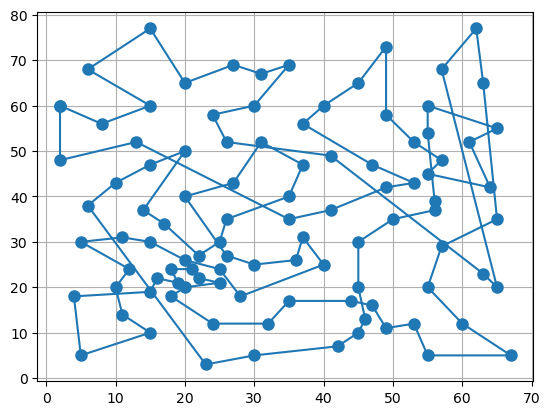

In [84]:
# Testing simulated annealing algorithm for the given dataset

# n = 101
n, nodes = load_data("C:/Users/Elena/OneDrive - Universitatea Babeş-Bolyai/AI UBB - Semester 4/Metaheuristics/Labs/lab3/input_files/eil101.tsp")

permutation, fitness = tsp_simulated_annealing(n, nodes, temp_initial=1000, max_iterations=500000)

print(f"Solution to TSP for {n} nodes:")
print(f"Fitness: {fitness}")

print("Route found:")
plot_tsp(nodes, permutation)

# Knapsack Problem
- $n$ objects, each has a value ($v$) and a weight ($w$)
- Objective: the knapsack to contain max value without exceeding max weight $W$
$$ \text{maximise } \sum_{i=n}^n v_i x_i $$
$$ \text{subject to } \sum_{i=n}^n v=w_i x_i \leq W  $$
- $x_i=1$ means object $i$ is selected
- $x_i=0$ means object $j$ is not selected

## Knapsack problem: prerequisites
Helper functions for knapsack solution generation and evaluation

In [85]:
# Data loading function

def load_data(file_name):
  '''
    Loads data for the knapsack problem from a file
    Input:
      - file_name: str
    Output:
      - n: int
      - weights_and_values: list[tuple[int, int]]
      - max_weight: int
  '''
  weights_and_values = []
  with open(file_name) as f:
    # first number = number of records
    size = (int)(f.readline().strip())
    # read index, value, weight for all records
    for i in range(size):
      info = f.readline().strip().split()
      index, value, weight = (int)(info[0]), (int)(info[1]), (int)(info[2])
      weights_and_values.append((weight, value))
    # last number = maximum weight
    max_weight = (int)(f.readline().strip())
  return size, weights_and_values, max_weight

In [86]:
# Knapsack solution evaluation functions

def knapsack_weight(n, weights_and_values, configuration):
  '''
    Returns the total weight of the knapsack for a certain configuration
    Input:
      - n: int
      - weights_and_values: list[tuple[int, int]]
      - configuration: list[{0,1}] -> size = n
    Output:
      - weight: int
  '''
  weight = 0
  for i in range(n):
    if configuration[i] == 1:
      curr_weight, curr_value = weights_and_values[i]
      weight += curr_weight
  return weight

def knapsack_value(n, weights_and_values, configuration):
  '''
    Returns the total value of the knapsack for a certain configuration
    Input:
      - n: int
      - weights_and_values: list[tuple[int, int]]
      - configuration: list[{0,1}] -> size = n
    Output:
      - value: int
  '''
  value = 0
  for i in range(n):
    if configuration[i] == 1:
      curr_weight, curr_value = weights_and_values[i]
      value += curr_value
  return value

def knapsack_is_valid(n, weights_and_values, configuration, max_weight):
  '''
    Checks if a certain knapsack configuration is a valid solution
    Input:
      - n: int
      - weights_and_values: list[tuple[int, int]]
      - configuration: list[{0,1}] -> size = n
      - max_weight: int
    Output:
      - bool
  '''
  weight = knapsack_weight(n, weights_and_values, configuration)
  return weight <= max_weight

def knapsack_fitness(n, weights_and_values, configuration, max_weight):
  '''
    Returns the total value of the knapsack for a certain configuration if it is valid
      or -1 if it is not valid
    Input:
      - n: int
      - weights_and_values: list[tuple[int, int]]
      - configuration: list[{0,1}] -> size = n
    Output:
      - fitness: int
  '''
  if not knapsack_is_valid(n, weights_and_values, configuration, max_weight):
    return -1
  return knapsack_value(n, weights_and_values, configuration)

In [87]:
# Random knapsack solutions generation functions

def generate_random_configuration(n):
  '''
    Generate a random binary list of size n
    Input:
      - n: int
    Output:
      - list[{0,1}] -> size = n
  '''
  return np.random.randint(2, size=n).tolist()

def generate_random_knapsack(n, weights_and_values, max_weight):
  '''
    Generates a random knapsack configuration and computes its weight, value and fitness
    Input:
      - n: int
      - weights_and_values: list[tuple[int, int]]
      - max_weight: int
    Output:
      - configuration: list[{0,1}] -> size = n
      - weight: int
      - value: int
      - fitness: int
  '''
  configuration = generate_random_configuration(n)
  weight = knapsack_weight(n, weights_and_values, configuration)
  value = knapsack_value(n, weights_and_values, configuration)
  fitness = knapsack_fitness(n, weights_and_values, configuration, max_weight)
  return configuration, weight, value, fitness

def generate_random_valid_knapsack(n, weights_and_values, max_weight):
  '''
    Generates random knapsack configurations until it finds a valid one
    Input:
      - n: int
      - weights_and_values: list[tuple[int, int]]
      - max_weight: int
    Output:
      - configuration: list[{0,1}] -> size = n
      - weight: int
      - value: int
      - fitness: int
  '''
  while True:
    configuration, weight, value, fitness = generate_random_knapsack(n, weights_and_values, max_weight)
    if fitness > 0:
      break
  return configuration, weight, value, fitness

In [88]:
# Display functions

def print_knapsack_solution(n, weights_and_values, max_weight, configuration):
  '''
    Prints a solution of a given knapsack problem
    Input:
      - n: int
      - weights_and_values: list[tuple[int, int]]
      - max_weight: int
      - configuration: list[{0,1}] -> size = n
    Output: None
  '''
  weight = knapsack_weight(n, weights_and_values, configuration)
  value = knapsack_value(n, weights_and_values, configuration)
  fitness = knapsack_fitness(n, weights_and_values, configuration, max_weight)
  print(f"Solution for knapsack problem of size {n} with max weight {max_weight}:")
  print(f"Configuration: {configuration}")
  print(f"Weight: {weight}; Value: {value}")
  print(f"Fitness: {fitness}")

def lists_to_markdown_table(header, *lists):
  '''
    Returns a string formatted like a markdown table which contains data from the header and the lists
    Input:
      - header: string
      - *lists: varying number of list[] -> size = n
    Output:
      - markdown_table: string
  '''
  markdown_table = header
  n = len(lists[0])
  for i in range(n):
    markdown_table += "|"
    for list in lists:
      markdown_table += f" {list[i]} |"
    markdown_table += "\n"
  return markdown_table

# Simulated annealing solution to the Knapsack Problem

## Implementation

In [92]:
# Helper functions

def random_flip_configuration(n, configuration):
  '''
    Flips a random bit in a configuration
    Input:
      - n: int
      - configuration: list[{0,1}] -> size = n
    Output:
      - new_configuration: list[{0,1}] -> size = n
  '''
  flip_position = random.randint(0, n - 1)
  new_configuration = configuration[:]
  if new_configuration[flip_position] == 0:
    new_configuration[flip_position] = 1
  else:
    new_configuration[flip_position] = 0
  return new_configuration

def evaluation_func(current_fitness, new_fitness, temp):
  '''
    Decides if a worse point is accepted with probability given by an exponential function
    Input:
      current_fitness: float
      new_fitness: float
      temp: float
    Output:
      boolean
  '''
  value= math.exp((new_fitness - current_fitness) / temp)
  chance = random.random()
  if chance < value:
      return True
  return False

def decrease_temp(temp, alpha):
  '''
    Decreases the value of the temperature in accordance to parameter alpha (cooling rate)
    Input:
      temp: float
      aplha: float
    Output:
      float
    '''
  return alpha * temp

In [174]:
# Simulated annealing algorithm for the Knapsack Problem

def knapsack_simulated_annealing(n, weights_and_values, max_weight, temp_initial=10000, min_temp=1e-6, alpha=0.99, max_iterations=10000):
  '''
    Implements a simulated annealing algorithm for the knapsack problem
    Input:
      - n: int
      - weights_and_values: list[tuple[int, int]]
      - max_weight: int
      - temp_initial: float (default value: 10000)
      - min_temp: float (default value: 10^-6)
      - alpha: float (default value: 0.99)
      - max_iterations: int (default value: 10000)
    Output:
      - current_configuration: list[{0,1}] -> size = n
      - current_fitness: int
  '''
  temp = temp_initial
  current_configuration, _, _, current_fitness = generate_random_valid_knapsack(n, weights_and_values, max_weight)
  
  while temp > min_temp: # stops when temperatire reaches a minimum predefined temperature value
    iterations = 0
    while iterations < max_iterations: # stops when the number of iterations reaches a maximum value
      new_configuration = random_swap_permutation(n, current_configuration)
      new_fitness = knapsack_fitness(n, weights_and_values, new_configuration, max_weight)
      
      if new_fitness > current_fitness:
        current_configuration = new_configuration
        current_fitness = new_fitness
      
      elif evaluation_func(current_fitness, new_fitness, temp):
        current_configuration = new_configuration
        current_fitness = new_fitness
      
      iterations += 1
      temp = decrease_temp(temp, alpha)
      
  return current_configuration, current_fitness

def knapsack_simulated_annealing_n_times(m, n, weights_and_values, max_weight, temp_initial=10000, min_temp=1e-6, alpha = 0.99, max_iterations=10000):
  '''
    Runs the simualted annealing algorithm for the knapsack problem m times and returns the best solutions found
    Input:
      - m: int
      - n: int
      - weights_and_values: list[tuple[int, int]]
      - max_weight: int
      - temp_initial: float (default value: 10000)
      - min_temp: float (default value: 10^-6)
      - alpha: float (default value: 0.99)
      - max_iterations: int (default value: 100)
    Output:
      - best_solutions: list[float]
  '''
  best_solutions = []
  for step in range(m):
    _, best_evaluated = knapsack_simulated_annealing(n, weights_and_values, max_weight, temp_initial=temp_initial, min_temp=min_temp, alpha=alpha, max_iterations=max_iterations)
    best_solutions.append(best_evaluated)
  return best_solutions

## Testing

In [163]:
# Testing the simulated annealing algorithm for different values of n

n, weights_and_values, max_weight = load_data("C:/Users/Elena/OneDrive - Universitatea Babeş-Bolyai/AI UBB - Semester 4/Metaheuristics/Labs/lab1/input_files/knapsack-20.txt")

start_time = time.time()
configuration, current_fitness = knapsack_simulated_annealing(n, weights_and_values, max_weight)
end_time = time.time()

print_knapsack_solution(n, weights_and_values, max_weight, configuration)
print(f"\nExecution time: {end_time - start_time}\n")


n, weights_and_values, max_weight = load_data("C:/Users/Elena/OneDrive - Universitatea Babeş-Bolyai/AI UBB - Semester 4/Metaheuristics/Labs/lab1/input_files/rucsac-200.txt")

start_time = time.time()
configuration, current_fitness = knapsack_simulated_annealing(n, weights_and_values, max_weight)
end_time = time.time()

print_knapsack_solution(n, weights_and_values, max_weight, configuration)
print(f"\nExecution time: {end_time - start_time}\n")


Solution for knapsack problem of size 20 with max weight 524:
Configuration: [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0]
Weight: 337; Value: 507
Fitness: 507

Execution time: 0.03996562957763672

Solution for knapsack problem of size 200 with max weight 112648:
Configuration: [1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]
Weight: 112645; Value: 134345
Fitness: 134345

Execution time: 0.23650789260864258



## Performance analysis

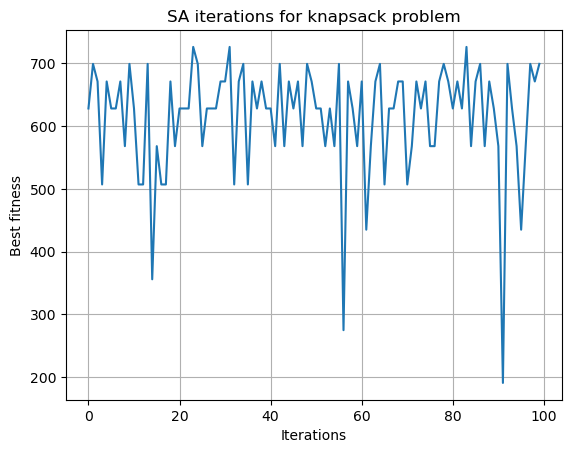

In [172]:
# Running multiple iterations of simulated annealing algorithm for the knapsack problem

n, weights_and_values, max_weight = load_data("C:/Users/Elena/OneDrive - Universitatea Babeş-Bolyai/AI UBB - Semester 4/Metaheuristics/Labs/lab1/input_files/knapsack-20.txt")

# testing small dataset for 100 iterations
iterations = 100
best_fitnesses = knapsack_simulated_annealing_n_times(iterations, n, weights_and_values, max_weight)

# plot data
plt.plot(best_fitnesses)
plt.grid()
plt.xlabel("Iterations")
plt.ylabel("Best fitness")
plt.title("SA iterations for knapsack problem")
plt.show()

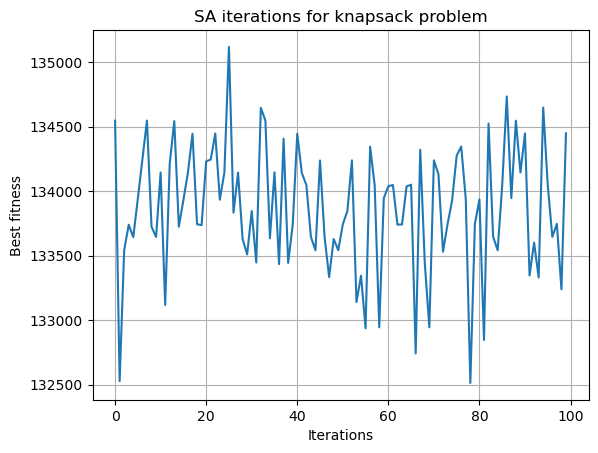

In [173]:
# Running multiple iterations of simulated annealing algorithm for the knapsack problem

n, weights_and_values, max_weight = load_data("C:/Users/Elena/OneDrive - Universitatea Babeş-Bolyai/AI UBB - Semester 4/Metaheuristics/Labs/lab1/input_files/rucsac-200.txt")

# testing large dataset for 100 iterations
iterations = 100
best_fitnesses = knapsack_simulated_annealing_n_times(iterations, n, weights_and_values, max_weight)

# plot data
plt.plot(best_fitnesses)
plt.grid()
plt.xlabel("Iterations")
plt.ylabel("Best fitness")
plt.title("SA iterations for knapsack problem")
plt.show()

In [175]:
# Testing algorithm for different values of temp_initial, min_temp, alpha and max_iterations

# small dataset
n, weights_and_values, max_weight = load_data("C:/Users/Elena/OneDrive - Universitatea Babeş-Bolyai/AI UBB - Semester 4/Metaheuristics/Labs/lab1/input_files/knapsack-20.txt")

max_iterations_options = [100000, 10000, 1000]
temp_initial_options = [10000, 1000]
alpha_options = [0.995, 0.99, 0.95]
min_temp_options = [1e-6, 1e-4]

# total expermients: 36

max_iterations_list = []
temp_initial_list = []
alpha_list = []
min_temp_list = []

fitness_list = []
execution_time_list = []

for max_iterations in max_iterations_options:
  for temp_initial in temp_initial_options:
    for alpha in alpha_options:
      for min_temp in min_temp_options:
        # perform 10 experiments for given values
        start_time = time.time()
        best_fitnesses = knapsack_simulated_annealing_n_times(10, n, weights_and_values, max_weight, temp_initial=temp_initial, min_temp=min_temp, alpha=alpha, max_iterations=max_iterations)
        end_time = time.time()

        average_fitness = np.array(best_fitnesses).mean()
        average_execution_time = (end_time - start_time) / 10

        max_iterations_list.append(max_iterations)
        temp_initial_list.append(temp_initial)
        alpha_list.append(alpha)
        min_temp_list.append(min_temp)
        fitness_list.append(average_fitness)
        execution_time_list.append(average_execution_time)
        

In [178]:
# display experiment results in markdown table

header = "| Max. iterations | Initial temp. | Alpha | Min. temp | Fitness | Execution time |\n"
header += "|---|---|---|---|---|---|\n"
markdown_table = lists_to_markdown_table(header, max_iterations_list, temp_initial_list, alpha_list, min_temp_list, fitness_list, execution_time_list)

| Max. iterations | Initial temp. | Alpha | Min. temp | Fitness | Execution time |
|---|---|---|---|---|---|
| 100000 | 10000 | 0.995 | 1e-06 | 632.7 | 0.37187063694000244 |
| 100000 | 10000 | 0.995 | 0.0001 | 638.2 | 0.36174306869506834 |
| 100000 | 10000 | 0.99 | 1e-06 | 595.4 | 0.3559060573577881 |
| 100000 | 10000 | 0.99 | 0.0001 | 635.4 | 0.35973660945892333 |
| 100000 | 10000 | 0.95 | 1e-06 | 626.7 | 0.36007122993469237 |
| 100000 | 10000 | 0.95 | 0.0001 | 645.8 | 0.35814437866210935 |
| 100000 | 1000 | 0.995 | 1e-06 | 628.6 | 0.3560094118118286 |
| 100000 | 1000 | 0.995 | 0.0001 | 632.1 | 0.35898556709289553 |
| 100000 | 1000 | 0.99 | 1e-06 | 635.1 | 0.35900924205780027 |
| 100000 | 1000 | 0.99 | 0.0001 | 648.7 | 0.3614571332931519 |
| 100000 | 1000 | 0.95 | 1e-06 | 633.8 | 0.36347403526306155 |
| 100000 | 1000 | 0.95 | 0.0001 | 622.3 | 0.37470178604125975 |
| 10000 | 10000 | 0.995 | 1e-06 | 572.0 | 0.03847651481628418 |
| 10000 | 10000 | 0.995 | 0.0001 | 605.7 | 0.038334441184997556 |
| 10000 | 10000 | 0.99 | 1e-06 | 642.4 | 0.039539027214050296 |
| 10000 | 10000 | 0.99 | 0.0001 | 615.1 | 0.03613502979278564 |
| 10000 | 10000 | 0.95 | 1e-06 | 608.8 | 0.036530256271362305 |
| 10000 | 10000 | 0.95 | 0.0001 | 649.9 | 0.03699369430541992 |
| 10000 | 1000 | 0.995 | 1e-06 | 666.5 | 0.03550705909729004 |
| 10000 | 1000 | 0.995 | 0.0001 | 629.9 | 0.03756594657897949 |
| 10000 | 1000 | 0.99 | 1e-06 | 615.0 | 0.03532884120941162 |
| 10000 | 1000 | 0.99 | 0.0001 | 665.8 | 0.036024284362792966 |
| 10000 | 1000 | 0.95 | 1e-06 | 603.5 | 0.035241556167602536 |
| 10000 | 1000 | 0.95 | 0.0001 | 631.0 | 0.035704946517944335 |
| 1000 | 10000 | 0.995 | 1e-06 | 651.8 | 0.01782073974609375 |
| 1000 | 10000 | 0.995 | 0.0001 | 634.0 | 0.014184713363647461 |
| 1000 | 10000 | 0.99 | 1e-06 | 615.9 | 0.010491752624511718 |
| 1000 | 10000 | 0.99 | 0.0001 | 646.6 | 0.007208776473999023 |
| 1000 | 10000 | 0.95 | 1e-06 | 655.0 | 0.0035173892974853516 |
| 1000 | 10000 | 0.95 | 0.0001 | 625.0 | 0.003566074371337891 |
| 1000 | 1000 | 0.995 | 1e-06 | 625.7 | 0.01811797618865967 |
| 1000 | 1000 | 0.995 | 0.0001 | 591.3 | 0.014206767082214355 |
| 1000 | 1000 | 0.99 | 1e-06 | 633.7 | 0.01085360050201416 |
| 1000 | 1000 | 0.99 | 0.0001 | 545.8 | 0.007065176963806152 |
| 1000 | 1000 | 0.95 | 1e-06 | 643.0 | 0.0036974191665649415 |
| 1000 | 1000 | 0.95 | 0.0001 | 635.9 | 0.0037661075592041017 |

In [182]:
# analyse fitness by each parameter option

max_iterations_options = [100000, 10000, 1000]
temp_initial_options = [10000, 1000]
alpha_options = [0.995, 0.99, 0.95]
min_temp_options = [1e-6, 1e-4]

# average fitness and average time by max_iterations
for max_iteration in max_iterations_options:
  fitnesses = []
  execution_times = []
  for i in range(36):
    if max_iterations_list[i] == max_iteration:
      fitnesses.append(fitness_list[i])
      execution_times.append(execution_time_list[i])
  average_fitness = np.array(fitnesses).mean()
  average_execution_time = np.array(execution_times).mean()
  # print results
  print(f"Max iterations: {max_iteration}, average fitness: {average_fitness}, average execution time: {average_execution_time}")

print()

# average fitness and average time by temp_initial
for temp_initial in temp_initial_options:
  fitnesses = []
  execution_times = []
  for i in range(36):
    if temp_initial_list[i] == temp_initial:
      fitnesses.append(fitness_list[i])
      execution_times.append(execution_time_list[i])
  average_fitness = np.array(fitnesses).mean()
  average_execution_time = np.array(execution_times).mean()
  # print results
  print(f"Initial temperature: {temp_initial}, average fitness: {average_fitness}, average execution time: {average_execution_time}")

print()

# average fitness and average time by alpha
for alpha in alpha_options:
  fitnesses = []
  execution_times = []
  for i in range(36):
    if alpha_list[i] == alpha:
      fitnesses.append(fitness_list[i])
      execution_times.append(execution_time_list[i])
  average_fitness = np.array(fitnesses).mean()
  average_execution_time = np.array(execution_times).mean()
  # print results
  print(f"Alpha: {alpha}, average fitness: {average_fitness}, average execution time: {average_execution_time}")

print()

# average fitness and average time by min_temp
for min_temp in min_temp_options:
  fitnesses = []
  execution_times = []
  for i in range(36):
    if min_temp_list[i] == min_temp:
      fitnesses.append(fitness_list[i])
      execution_times.append(execution_time_list[i])
  average_fitness = np.array(fitnesses).mean()
  average_execution_time = np.array(execution_times).mean()
  # print results
  print(f"Min temperature: {min_temp}, average fitness: {average_fitness}, average execution time: {average_execution_time}")

Max iterations: 100000, average fitness: 631.2333333333333, average execution time: 0.36175909638404846
Max iterations: 10000, average fitness: 625.4666666666666, average execution time: 0.036781799793243405
Max iterations: 1000, average fitness: 625.3083333333333, average execution time: 0.009541374444961547

Initial temperature: 10000, average fitness: 627.5777777777778, average execution time: 0.13612613280614216
Initial temperature: 1000, average fitness: 627.0944444444444, average execution time: 0.1359287142753601

Alpha: 0.995, average fitness: 625.7083333333334, average execution time: 0.13856857021649677
Alpha: 0.99, average fitness: 624.575, average execution time: 0.1348962942759196
Alpha: 0.95, average fitness: 631.7249999999999, average execution time: 0.13461740612983703

Min temperature: 1e-06, average fitness: 626.9777777777779, average execution time: 0.13619237475925022
Min temperature: 0.0001, average fitness: 627.6944444444443, average execution time: 0.135862472322

- We observe that the values who influence the performance of the algoritm in terms of fitness the most are the number of iterations and possibly the value of alpha.
- In terms of execution time, the number of iterations is the only value which influences it significantly.

In [183]:
# Testing algorithm for different values of temp_initial, min_temp, alpha and max_iterations

# large dataset
n, weights_and_values, max_weight = load_data("C:/Users/Elena/OneDrive - Universitatea Babeş-Bolyai/AI UBB - Semester 4/Metaheuristics/Labs/lab1/input_files/rucsac-200.txt")

max_iterations_options = [100000, 10000, 1000]
temp_initial_options = [15000, 10000]
alpha_options = [0.995, 0.99, 0.95]
min_temp_options = [1e-4]

# total expermients: 18

max_iterations_list = []
temp_initial_list = []
alpha_list = []
min_temp_list = []

fitness_list = []
execution_time_list = []

for max_iterations in max_iterations_options:
  for temp_initial in temp_initial_options:
    for alpha in alpha_options:
      for min_temp in min_temp_options:
        # perform 10 experiments for given values
        start_time = time.time()
        best_fitnesses = knapsack_simulated_annealing_n_times(10, n, weights_and_values, max_weight, temp_initial=temp_initial, min_temp=min_temp, alpha=alpha, max_iterations=max_iterations)
        end_time = time.time()

        average_fitness = np.array(best_fitnesses).mean()
        average_execution_time = (end_time - start_time) / 10

        max_iterations_list.append(max_iterations)
        temp_initial_list.append(temp_initial)
        alpha_list.append(alpha)
        min_temp_list.append(min_temp)
        fitness_list.append(average_fitness)
        execution_time_list.append(average_execution_time)
        

In [186]:
# display experiment results in markdown table

header = "| Max. iterations | Initial temp. | Alpha | Min. temp | Fitness | Execution time |\n"
header += "|---|---|---|---|---|---|\n"
markdown_table = lists_to_markdown_table(header, max_iterations_list, temp_initial_list, alpha_list, min_temp_list, fitness_list, execution_time_list)

| Max. iterations | Initial temp. | Alpha | Min. temp | Fitness | Execution time |
|---|---|---|---|---|---|
| 100000 | 15000 | 0.995 | 0.0001 | 134376.8 | 2.037057304382324 |
| 100000 | 15000 | 0.99 | 0.0001 | 134196.8 | 1.989227867126465 |
| 100000 | 15000 | 0.95 | 0.0001 | 134366.3 | 2.014578032493591 |
| 100000 | 10000 | 0.995 | 0.0001 | 134267.4 | 2.021644639968872 |
| 100000 | 10000 | 0.99 | 0.0001 | 134296.5 | 2.005981612205505 |
| 100000 | 10000 | 0.95 | 0.0001 | 134447.2 | 2.0208446979522705 |
| 10000 | 15000 | 0.995 | 0.0001 | 133699.1 | 0.1995577335357666 |
| 10000 | 15000 | 0.99 | 0.0001 | 133666.2 | 0.1986020803451538 |
| 10000 | 15000 | 0.95 | 0.0001 | 133611.0 | 0.19937796592712403 |
| 10000 | 10000 | 0.995 | 0.0001 | 133851.6 | 0.20644164085388184 |
| 10000 | 10000 | 0.99 | 0.0001 | 133645.4 | 0.20422039031982422 |
| 10000 | 10000 | 0.95 | 0.0001 | 133555.3 | 0.20866148471832274 |
| 1000 | 15000 | 0.995 | 0.0001 | 133079.2 | 0.08443202972412109 |
| 1000 | 15000 | 0.99 | 0.0001 | 132688.3 | 0.044176340103149414 |
| 1000 | 15000 | 0.95 | 0.0001 | 132549.1 | 0.021753644943237303 |
| 1000 | 10000 | 0.995 | 0.0001 | 133148.1 | 0.0871124505996704 |
| 1000 | 10000 | 0.99 | 0.0001 | 132526.0 | 0.045064353942871095 |
| 1000 | 10000 | 0.95 | 0.0001 | 132073.1 | 0.022137451171875 |

In [187]:
# analyse fitness by each parameter option

max_iterations_options = [100000, 10000, 1000]
temp_initial_options = [15000, 10000]
alpha_options = [0.995, 0.99, 0.95]
min_temp_options = [1e-4]

# average fitness and average time by max_iterations
for max_iteration in max_iterations_options:
  fitnesses = []
  execution_times = []
  for i in range(18):
    if max_iterations_list[i] == max_iteration:
      fitnesses.append(fitness_list[i])
      execution_times.append(execution_time_list[i])
  average_fitness = np.array(fitnesses).mean()
  average_execution_time = np.array(execution_times).mean()
  # print results
  print(f"Max iterations: {max_iteration}, average fitness: {average_fitness}, average execution time: {average_execution_time}")

print()

# average fitness and average time by temp_initial
for temp_initial in temp_initial_options:
  fitnesses = []
  execution_times = []
  for i in range(18):
    if temp_initial_list[i] == temp_initial:
      fitnesses.append(fitness_list[i])
      execution_times.append(execution_time_list[i])
  average_fitness = np.array(fitnesses).mean()
  average_execution_time = np.array(execution_times).mean()
  # print results
  print(f"Initial temperature: {temp_initial}, average fitness: {average_fitness}, average execution time: {average_execution_time}")

print()

# average fitness and average time by alpha
for alpha in alpha_options:
  fitnesses = []
  execution_times = []
  for i in range(18):
    if alpha_list[i] == alpha:
      fitnesses.append(fitness_list[i])
      execution_times.append(execution_time_list[i])
  average_fitness = np.array(fitnesses).mean()
  average_execution_time = np.array(execution_times).mean()
  # print results
  print(f"Alpha: {alpha}, average fitness: {average_fitness}, average execution time: {average_execution_time}")

print()

# average fitness and average time by min_temp
for min_temp in min_temp_options:
  fitnesses = []
  execution_times = []
  for i in range(18):
    if min_temp_list[i] == min_temp:
      fitnesses.append(fitness_list[i])
      execution_times.append(execution_time_list[i])
  average_fitness = np.array(fitnesses).mean()
  average_execution_time = np.array(execution_times).mean()
  # print results
  print(f"Min temperature: {min_temp}, average fitness: {average_fitness}, average execution time: {average_execution_time}")

Max iterations: 100000, average fitness: 134325.16666666666, average execution time: 2.0148890256881713
Max iterations: 10000, average fitness: 133671.43333333335, average execution time: 0.20281021595001222
Max iterations: 1000, average fitness: 132677.3, average execution time: 0.05077937841415405

Initial temperature: 15000, average fitness: 133581.42222222223, average execution time: 0.7543069998423257
Initial temperature: 10000, average fitness: 133534.51111111112, average execution time: 0.7580120801925658

Alpha: 0.995, average fitness: 133737.0333333333, average execution time: 0.7727076331774394
Alpha: 0.99, average fitness: 133503.19999999998, average execution time: 0.7478787740071615
Alpha: 0.95, average fitness: 133433.66666666666, average execution time: 0.7478922128677367

Min temperature: 0.0001, average fitness: 133557.96666666667, average execution time: 0.7561595400174458


## Conclusions
The Simulated Annealing algorithm provides good solutions for the knapsack problem with relatively low computational power needed.  
It explores the search space by allowing moving to worse performing solutions with a dynamic probability (given by the temperature parameter).  
At first it explores more freely, but as the algorithm progresses the search space tends to narrow until a local optimum is found. This is ensured by the cooling function.  
  
The parameters which influence the performance of the algorithm are: 
- number of maximum iterations
- initial temperature
- the cooling constant alpha
- the minimum temperature (halting condition)
  
Through experiments, we have seen that a good solution in terms of fitness involves:
- a higher number of iterations (ideally over 10.0000)
- a higher initial temperature (slightly higher than the maximum fitness is usually sufficient)
- a cooling constant above 0.9 ideally
- a minimum temperature lower than 0.0001 ideally
  
The solutions however are subject to quite significant variance due to the stochastic nature of the algorithm, so for better results an average value over a number of iterations (above 10) is better than one single experiment.